# Fake news Prediction using NLP approach
## Tensorflow is used to train model

In [1]:
import numpy as np
import sklearn
import tensorflow as tf
import pandas as pd

In [2]:
DATA_PATH = "data/news.csv"

In [3]:
df = pd.read_csv(DATA_PATH)
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
labels = df['label']

In [6]:
labels.shape

(6335,)

In [71]:
data = df.drop('label',axis = 1).drop('Unnamed: 0',axis = 1)
data.shape

(6335, 2)

In [43]:

all_sentences  = list()
for column in data.values:
    for sentence in column:
        all_sentences.append(sentence)
all_sentences[0]

'You Can Smell Hillary’s Fear'

In [21]:
from sklearn import preprocessing
def label_encode_binary(labels):
    binirizer = preprocessing.MultiLabelBinarizer()
    return (binirizer.fit_transform(labels),binirizer.classes_)

In [23]:
words  = [word.split(',') for word in labels]
encoded_label,classes = label_encode_binary(words)

In [24]:

encoded_label

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [44]:
classes

array(['FAKE', 'REAL'], dtype=object)

In [ ]:
class TextProcessor(object):
    def __init__(self,vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self,text_list):
        tokenizer =  tf.keras.preprocessing.text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
        
    def transform(self,text_list):
        tokinizer_matrix = self._tokenizer.texts_to_matrix(text_list)
        return tokinizer_matrix

In [61]:
poccessor = TextProcessor(200)

poccessor.create_tokenizer(all_sentences)
title = np.array(poccessor.transform(data['title'].values))
body = np.array(poccessor.transform(data['text'].values))

In [62]:
title

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
data = np.concatenate((title,body), axis=1)
data.shape

(6335, 400)

In [73]:
import pickle
with open('./processor_state.pkl','wb') as f:
    pickle.dump(poccessor,f)

In [75]:
train_size = int(len(df)*.8)
train_labels = encoded_label[:train_size]
test_labels = encoded_label[train_size:]
data_train = data[:train_size]
data_test = data[train_size:]

In [76]:
data_test.shape

(1267, 400)

In [77]:
data_train.shape

(5068, 400)

In [82]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Dense(128,input_shape = (400,) ,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 59,714
Trainable params: 59,714
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(data_train, train_labels,
epochs=40,
batch_size=128,
validation_split=0.2)

Epoch 1/40
32/32 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.6341 - val_loss: 0.4307 - val_accuracy: 0.8116
Epoch 2/40
32/32 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8273 - val_loss: 0.3346 - val_accuracy: 0.8560
Epoch 3/40
32/32 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8695 - val_loss: 0.3102 - val_accuracy: 0.8748
Epoch 4/40
32/32 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8849 - val_loss: 0.3234 - val_accuracy: 0.8570
Epoch 5/40
32/32 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9021 - val_loss: 0.3021 - val_accuracy: 0.8826
Epoch 6/40
32/32 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9174 - val_loss: 0.3108 - val_accuracy: 0.8846
Epoch 7/40
32/32 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9270 - val_loss: 0.3036 - val_accuracy: 0.8807
Epoch 8/40
32/32 [==

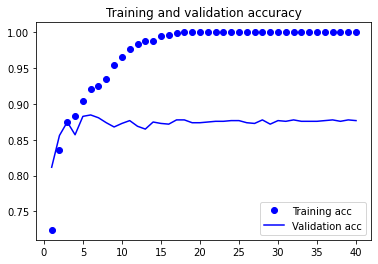

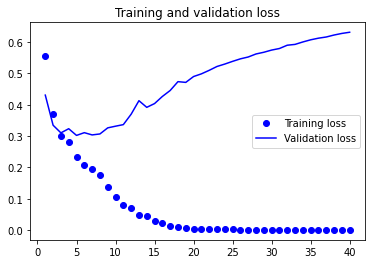

In [84]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
model.evaluate(data_test,test_labels,batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.8642


[0.6840059757232666, 0.8642462491989136]

In [87]:
import os
import tempfile

MODEL_DIR = './model'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = ./model/1



In [88]:
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: ./model/1/assets


In [108]:
predictions = model.predict(data_test[2:3])

In [109]:
print(predictions)

[[0.0217019 0.9782981]]


In [110]:
class DecodePrediction(object):
    def __init__(self,label_class):
        self._label_class = label_class
    
    def decode_prediction(self,prediction):
        decoded = []
        for predicted in prediction:
            gratest_index = np.argmax(predicted)
            decoded.append(self._label_class[gratest_index]) 
        return decoded

In [111]:
decode_prediction = DecodePrediction(classes)

In [112]:
decode_prediction.decode_prediction(predictions)

['REAL']

In [118]:
import pickle
with open('./decoder_state.pkl','wb') as f:
    pickle.dump(decode_prediction,f)
    
import pickle
with open('./classes.pkl','wb') as f:
    pickle.dump(decode_prediction,f)

In [114]:
import shap

explainer = shap.DeepExplainer(model,data_train[:200])
sharp_vals = explainer.shap_values(data_test[:25])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [115]:
words  = poccessor._tokenizer.word_index

word_lookup = [i for i in words.keys() ]
word_lookup = [""] + word_lookup


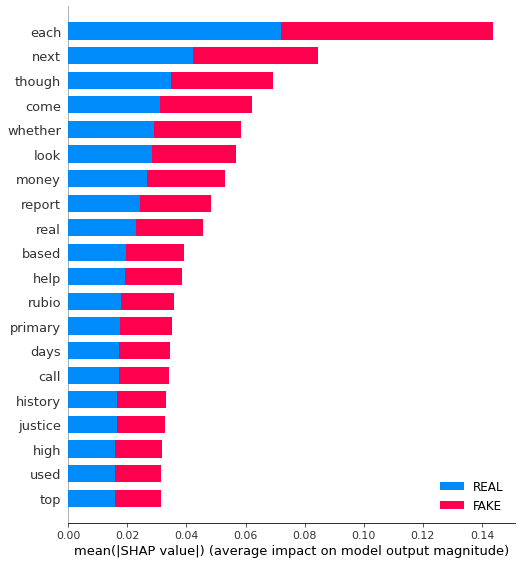

In [117]:
shap.summary_plot(sharp_vals,feature_names = word_lookup,class_names =classes)